In [1]:
# !pip install pyarrow
# !pip install fastparquet
# !pip install datasets
# !pip install scikit-uplift
# !pip uninstall scikit-uplift -y
# !pip install git+https://github.com/maks-sh/scikit-uplift.git@master
# !pip install lightgbm
# !pip install causalml

## 0. 라이브러리 및 데이터 불러오기

In [2]:
# ✅ 1. 라이브러리 불러오기
import pandas as pd
import numpy as np
from causalml.inference.tree import UpliftTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

/Users/gim-yongmin/miniforge3/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Failed to import duecredit due to No module named 'duecredit'


In [3]:

df = pd.read_csv("hf://datasets/criteo/criteo-uplift/criteo-research-uplift-v2.1.csv.gz")

## 1. 데이터 확인

In [4]:
# ✅ 2. 데이터 불러오기 및 컬럼 확인
print(df.head())
print(df.columns)

          f0         f1        f2        f3         f4        f5        f6  \
0  12.616365  10.059654  8.976429  4.679882  10.280525  4.115453  0.294443   
1  12.616365  10.059654  9.002689  4.679882  10.280525  4.115453  0.294443   
2  12.616365  10.059654  8.964775  4.679882  10.280525  4.115453  0.294443   
3  12.616365  10.059654  9.002801  4.679882  10.280525  4.115453  0.294443   
4  12.616365  10.059654  9.037999  4.679882  10.280525  4.115453  0.294443   

         f7        f8         f9       f10       f11  treatment  conversion  \
0  4.833815  3.955396  13.190056  5.300375 -0.168679          1           0   
1  4.833815  3.955396  13.190056  5.300375 -0.168679          1           0   
2  4.833815  3.955396  13.190056  5.300375 -0.168679          1           0   
3  4.833815  3.955396  13.190056  5.300375 -0.168679          1           0   
4  4.833815  3.955396  13.190056  5.300375 -0.168679          1           0   

   visit  exposure  
0      0         0  
1      0      

In [5]:
df.describe()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure
count,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07
mean,1.962030e+01,1.006998e+01,8.446582e+00,4.178923e+00,1.033884e+01,4.028513e+00,-4.155356e+00,5.101765e+00,3.933581e+00,1.602764e+01,5.333396e+00,-1.709672e-01,8.500001e-01,2.916680e-03,4.699200e-02,3.063122e-02
std,5.377464e+00,1.047557e-01,2.993161e-01,1.336645e+00,3.433081e-01,4.310974e-01,4.577914e+00,1.205248e+00,5.665958e-02,7.018975e+00,1.682288e-01,2.283277e-02,3.570713e-01,5.392748e-02,2.116217e-01,1.723164e-01
min,1.261636e+01,1.005965e+01,8.214383e+00,-8.398387e+00,1.028053e+01,-9.011892e+00,-3.142978e+01,4.833815e+00,3.635107e+00,1.319006e+01,5.300375e+00,-1.383941e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.261636e+01,1.005965e+01,8.214383e+00,4.679882e+00,1.028053e+01,4.115453e+00,-6.699321e+00,4.833815e+00,3.910792e+00,1.319006e+01,5.300375e+00,-1.686792e-01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.192341e+01,1.005965e+01,8.214383e+00,4.679882e+00,1.028053e+01,4.115453e+00,-2.411115e+00,4.833815e+00,3.971858e+00,1.319006e+01,5.300375e+00,-1.686792e-01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.443646e+01,1.005965e+01,8.723335e+00,4.679882e+00,1.028053e+01,4.115453e+00,2.944427e-01,4.833815e+00,3.971858e+00,1.319006e+01,5.300375e+00,-1.686792e-01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2.674526e+01,1.634419e+01,9.051962e+00,4.679882e+00,2.112351e+01,4.115453e+00,2.944427e-01,1.199840e+01,3.971858e+00,7.529502e+01,6.473917e+00,-1.686792e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [6]:
# 그룹별 conversion rate 확인
df.pivot_table(values='conversion',
               index='treatment',
               aggfunc=[np.mean, np.size],
               margins=True)

/var/folders/yy/tnhbf53x7ts51jd8x1v9wzqm0000gn/T/ipykernel_11518/777319063.py:2: FutureWarning: The provided callable <function mean at 0x1064abaf0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.pivot_table(values='conversion',


,mean,size
,conversion,conversion
treatment,,
0,0.001938,2096937
1,0.003089,11882655
All,0.002917,13979592


## 2. 데이터 전처리
 - 데이터 임밸런스 --> 다운 샘플링 적용 안함
 - 스케일링 --> 트리 모델에서는 효과 미미하지만 적용함


In [7]:

# # 처치/통제 분리
treated = df[df['treatment'] == 1]
control = df[df['treatment'] == 0]

##### 데이터 카테고리간 불균형 확인해서 다운 샘플링하는 것이 효과가 있는지는 잘 모르겠음 ######
# control_size = len(control)
# treated_down = treated.sample(n=control_size, random_state=42)

# df_balanced = pd.concat([treated_down, control])
# print(df_balanced['treatment'].value_counts())


######################스케일링########################

from sklearn.preprocessing import StandardScaler

features = [col for col in df.columns if col not in ['conversion', 'treatment', 'visit','exposure']]
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df[features])


In [8]:
features = [col for col in df_scaled.columns if col not in ['conversion', 'treatment', 'visit','exposure']]  # id 컬럼 있으면 제외
X = df_scaled[features]
y = df_scaled['conversion']           # 0/1 (구매, 전환여부 등)
treatment = df_scaled['treatment']    # 1(처치)/0(통제)

## 3. 모델링
###  목표: 컨버전 확률이 높은(=업리프트 상위) 유저 집단만을 효과적으로 타겟팅하는 모델 개발

- **문제 배경:**  
  - 전체 처치/통제 그룹 모두 컨버전율이 매우 낮으므로, 무작위 마케팅은 의미가 없음  
  - 전환 가능성이 높은 상위 20% 유저(업리프트 스코어 기준)를 효과적으로 식별하는 것이 목적

---

#### 1) Baseline(기본값) 모델의 업리프트 성능 평가

- `UpliftTreeClassifier`를 기본 하이퍼파라미터(깊이=5, 리프=100, 처치최소=50 등)로 학습
- 테스트셋 전체 유저에 대해 **업리프트 스코어(treatment - control)** 예측
- **상위 20% 업리프트 집단**만 추출 → 이들 중에서 처치/통제 실전환율 차이(=실제 업리프트)를 계산  
  (즉, 광고 효과가 **실제로 크게 나타나는 타겟 집단의 업리프트**가 얼마나 되는지 평가)

---

#### 2) 하이퍼파라미터 탐색(튜닝) 및 기준 성능과 비교

- 여러 조합의 하이퍼파라미터(`max_depth`, `min_samples_leaf`, `min_samples_treatment`)를 탐색
- **모든 조합에서** 동일하게 업리프트 스코어를 예측하고, 상위 20% 집단의 실제 업리프트를 구함
- `evaluationFunction='KL'` (KL Divergence) 기준으로 모델 분할

- **핵심 로직:**  
  - 해당 파라미터 조합의 타겟 집단 업리프트가 baseline 모델보다 높은 경우만 별도 저장

---

#### 3) 결과 정리

- baseline 모델 대비 **업리프트가 더 높은 상위 조합 Top 10**을 테이블로 정리
- 즉, 단순 업리프트 예측이 아닌 "실제로 효과가 컸던 타겟 집단을 얼마나 더 잘 찾아내는가?"에 집중  
- 실무적으론 **광고 예산의 효율적 집행과 ROI 극대화**라는 실질적 비즈니스 목표에 부합

---

In [9]:
X_train, X_test, y_train, y_test, t_train, t_test = train_test_split(
    X, y, treatment, test_size=0.3, random_state=42
)
# Baseline(기본값) 모델 성능 계산
baseline_model = UpliftTreeClassifier(
    max_depth=5, min_samples_leaf=100, min_samples_treatment=50,
    n_reg=100, evaluationFunction='KL', control_name='0'
)
baseline_model.fit(X_train.values, t_train.astype(str).values, y_train.values)
baseline_pred = baseline_model.predict(X_test.values)
baseline_score = baseline_pred[:, 1] - baseline_pred[:, 0]

baseline_temp = X_test.copy()
baseline_temp['uplift_pred'] = baseline_score
baseline_temp['treatment'] = t_test.values
baseline_temp['conversion'] = y_test.values
baseline_threshold = np.percentile(baseline_score, 80)
baseline_target = baseline_temp[baseline_temp['uplift_pred'] >= baseline_threshold]

if len(baseline_target) > 0:
    baseline_treated = baseline_target[baseline_target['treatment'] == 1]
    baseline_control = baseline_target[baseline_target['treatment'] == 0]
    baseline_uplift = baseline_treated['conversion'].mean() - baseline_control['conversion'].mean()
else:
    baseline_uplift = np.nan

print(f"[Baseline uplift] {baseline_uplift:.6f}")

#  하이퍼파라미터 튜닝 + 매트릭은 그냥 Kullback-Leibler Divergence (쿨백-라이블러 다이버전스) 씀
max_depth_list = [3, 5, 10]
min_samples_leaf_list = [100, 200, 300]
min_samples_treatment_list = [50, 100, 150]
eval_functions = ['KL'] # , 'ED', 'Chi', 'CTS', 'DDP', 'IT', 'CIT', 'IDDP'
results = []

for eval_fn in eval_functions:
    for max_depth in max_depth_list:
        for min_samples_leaf in min_samples_leaf_list:
            for min_samples_treatment in min_samples_treatment_list:
                model = UpliftTreeClassifier(
                    max_depth=max_depth,
                    min_samples_leaf=min_samples_leaf,
                    min_samples_treatment=min_samples_treatment,
                    n_reg=100,
                    evaluationFunction=eval_fn,
                    control_name='0'
                )
                model.fit(X_train.values, t_train.astype(str).values, y_train.values)
                uplift_pred = model.predict(X_test.values)
                uplift_score = uplift_pred[:, 1] - uplift_pred[:, 0]
                uplift_threshold = np.percentile(uplift_score, 80)

                temp = X_test.copy()
                temp['uplift_pred'] = uplift_score
                temp['treatment'] = t_test.values
                temp['conversion'] = y_test.values
                target_group = temp[temp['uplift_pred'] >= uplift_threshold]

                if len(target_group) > 0:
                    treated = target_group[target_group['treatment'] == 1]
                    control = target_group[target_group['treatment'] == 0]
                    uplift_value = treated['conversion'].mean() - control['conversion'].mean()
                else:
                    uplift_value = np.nan

                # Baseline보다 높으면 저장
                if not np.isnan(uplift_value) and uplift_value > baseline_uplift:
                    results.append({
                        'eval_fn': eval_fn,
                        'max_depth': max_depth,
                        'min_samples_leaf': min_samples_leaf,
                        'min_samples_treatment': min_samples_treatment,
                        'uplift': uplift_value,
                        'n_target': len(target_group)
                    })

# 4. 결과 정리 (uplift 기준 상위 N개만 보기)
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='uplift', ascending=False)
print("\n[Baseline보다 높은 조합 Top 10]")
print(results_df.head(10))

[Baseline uplift] 0.002365

[Baseline보다 높은 조합 Top 10]
  eval_fn  max_depth  min_samples_leaf  min_samples_treatment    uplift  \
1      KL         10               100                    100  0.003809   
4      KL         10               200                    100  0.003809   
7      KL         10               300                    100  0.003809   
2      KL         10               100                    150  0.003777   
5      KL         10               200                    150  0.003777   
8      KL         10               300                    150  0.003777   
0      KL         10               100                     50  0.003727   
3      KL         10               200                     50  0.003727   
6      KL         10               300                     50  0.003725   

   n_target  
1   1057270  
4   1057270  
7   1057270  
2   1080065  
5   1080065  
8   1080065  
0   1060126  
3   1060126  
6   1059090  


In [10]:
uplift_model = UpliftTreeClassifier(
    max_depth= 10, ##5,
    min_samples_leaf= 100,#100,
    min_samples_treatment= 100,#50,
    n_reg=100,
    evaluationFunction='KL', #'KL',
    control_name='0'   # <- 0 → '0' (문자열)
)
uplift_model.fit(
    X_train.values,
    treatment=t_train.astype(str).values,   # treatment 컬럼도 string
    y=y_train.values
)

## 4. 전체 vs 타겟팅 업리프트 효과 비교
 ### 1) 전체 컨버전율이 극단적으로 낮은 데이터셋 특성
- 전체 컨버전율이 **0.2~0.3%대**라는 것은 거의 모든 유저가 전환하지 않는다는 의미.
- 이런 상황에서 무작정 전원에게 마케팅/광고/프로모션을 쏘는 것은 **비효율적**(비용만 나가고 실적은 미미).

---

### 2) 업리프트 모델의 목적
- **무작위(Target All)가 아니라, ‘광고/프로모션의 효과가 있을 가능성이 높은 사람’만을 선별**
- 즉, **처치(광고) 그룹과 통제(비광고) 그룹의 전환율 차이(=업리프트)가 ‘예상되는 집단’을 뽑아내는 것**이 목적
- 전환율이 낮은 곳에서 "가장 효율적으로" 예산을 집행 → **마케팅 ROI가 획기적으로 좋아짐**

---

### 3) 실제 결과 해석 (위 막대그래프 참고)
- **전체 집단:**
    - 처치: **0.31%**
    - 통제: **0.19%**
    - 업리프트: **0.12%p** (매우 낮음)

- **타겟팅 집단:**
    - 처치: **0.96%**
    - 통제: **0.58%**
    - 업리프트: **0.38%p** (3배 이상 향상)

- 업리프트 모델 덕분에 무의미하게 많은 사람에게 쏠 필요 없이, '**효과 있을 집단'만 집중 타겟팅** 가능
    - → **예산 집행 효율, CPA 개선, 캠페인 효과 증대**

---



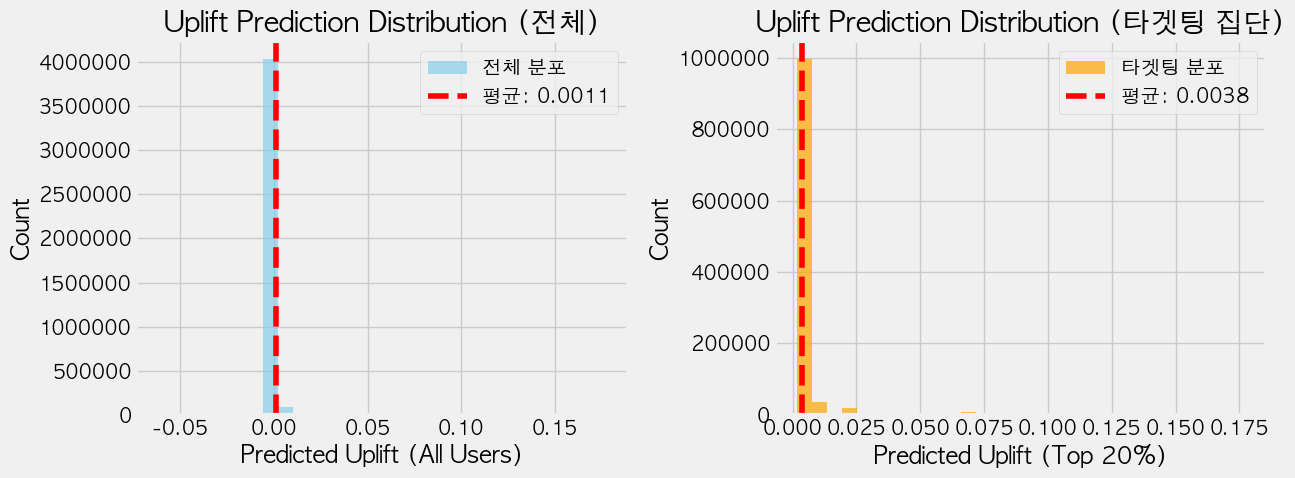

------ 전체 집단 ------
처치군 전환율: 0.0031
통제군 전환율: 0.0019
업리프트: 0.0012
------ 타겟팅 집단 ------
처치군 전환율: 0.0096
통제군 전환율: 0.0058
업리프트: 0.0038


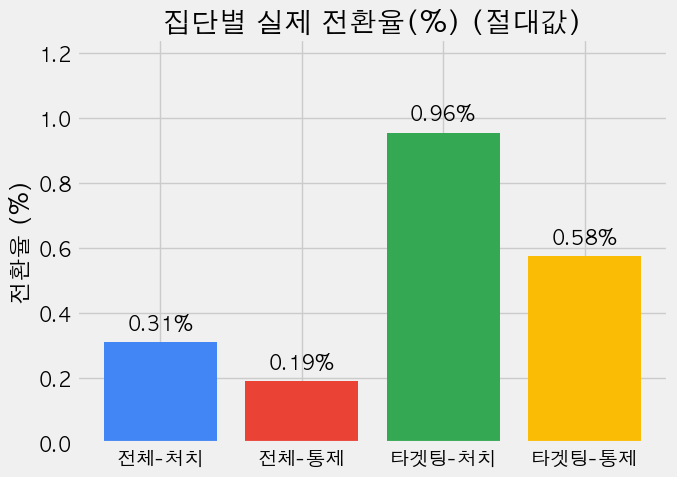

In [11]:
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# 전체 집단
mean_all = uplift_score.mean()
# 타겟팅 집단
mean_target = target_group['uplift_pred'].mean()

plt.figure(figsize=(13, 5))

#  전체 집단 업리프트 분포 + 평균 막대

plt.subplot(1, 2, 1)
plt.hist(uplift_score, bins=30, alpha=0.7, color='skyblue', label="전체 분포")
plt.axvline(mean_all, color='red', linestyle='--', label=f"평균: {mean_all:.4f}")
plt.xlabel("Predicted Uplift (All Users)")
plt.ylabel("Count")
plt.title("Uplift Prediction Distribution (전체)")
plt.ticklabel_format(style='plain')
plt.legend()

#  타겟팅 집단 업리프트 분포 + 평균 막대
plt.subplot(1, 2, 2)
plt.hist(target_group['uplift_pred'], bins=30, alpha=0.7, color='orange', label="타겟팅 분포")
plt.axvline(mean_target, color='red', linestyle='--', label=f"평균: {mean_target:.4f}")
plt.xlabel("Predicted Uplift (Top 20%)")
plt.ylabel("Count")
plt.title("Uplift Prediction Distribution (타겟팅 집단)")
plt.ticklabel_format(style='plain')
plt.legend()

plt.tight_layout()
plt.show()

uplift_pred = uplift_model.predict(X_test.values)
uplift_score = uplift_pred[:, 1] - uplift_pred[:, 0]

X_test = X_test.copy()
X_test['uplift_pred'] = uplift_score
X_test['treatment'] = t_test.values
X_test['conversion'] = y_test.values

uplift_threshold = np.percentile(uplift_score, 80)
target_group = X_test[X_test['uplift_pred'] >= uplift_threshold]

# 전체 집단에서 처치, 통제 전환율
overall_treated = X_test[X_test['treatment'] == 1]
overall_control = X_test[X_test['treatment'] == 0]
overall_treated_cr = overall_treated['conversion'].mean()
overall_control_cr = overall_control['conversion'].mean()

# 타겟팅 집단에서 처치, 통제 전환율
target_treated = target_group[target_group['treatment'] == 1]
target_control = target_group[target_group['treatment'] == 0]
target_treated_cr = target_treated['conversion'].mean()
target_control_cr = target_control['conversion'].mean()

print("------ 전체 집단 ------")
print(f"처치군 전환율: {overall_treated_cr:.4f}")
print(f"통제군 전환율: {overall_control_cr:.4f}")
print(f"업리프트: {overall_treated_cr - overall_control_cr:.4f}")

print("------ 타겟팅 집단 ------")
print(f"처치군 전환율: {target_treated_cr:.4f}")
print(f"통제군 전환율: {target_control_cr:.4f}")
print(f"업리프트: {target_treated_cr - target_control_cr:.4f}")

# 전체 집단
overall_treated_cr = X_test[X_test['treatment']==1]['conversion'].mean()
overall_control_cr = X_test[X_test['treatment']==0]['conversion'].mean()
# 타겟팅 집단
target_treated_cr = target_group[target_group['treatment']==1]['conversion'].mean()
target_control_cr = target_group[target_group['treatment']==0]['conversion'].mean()

labels = ['전체-처치', '전체-통제', '타겟팅-처치', '타겟팅-통제']
cr_values = [overall_treated_cr, overall_control_cr, target_treated_cr, target_control_cr]

plt.figure(figsize=(7,5))
bars = plt.bar(labels, np.array(cr_values)*100, color=['#4285F4', '#EA4335', '#34A853', '#FBBC05'])
plt.ylabel("전환율 (%)")
plt.title("집단별 실제 전환율(%) (절대값)")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.03, f"{yval:.2f}%", ha='center', va='bottom')

plt.ylim(0, max(cr_values)*100*1.3)
plt.tight_layout()
plt.show()



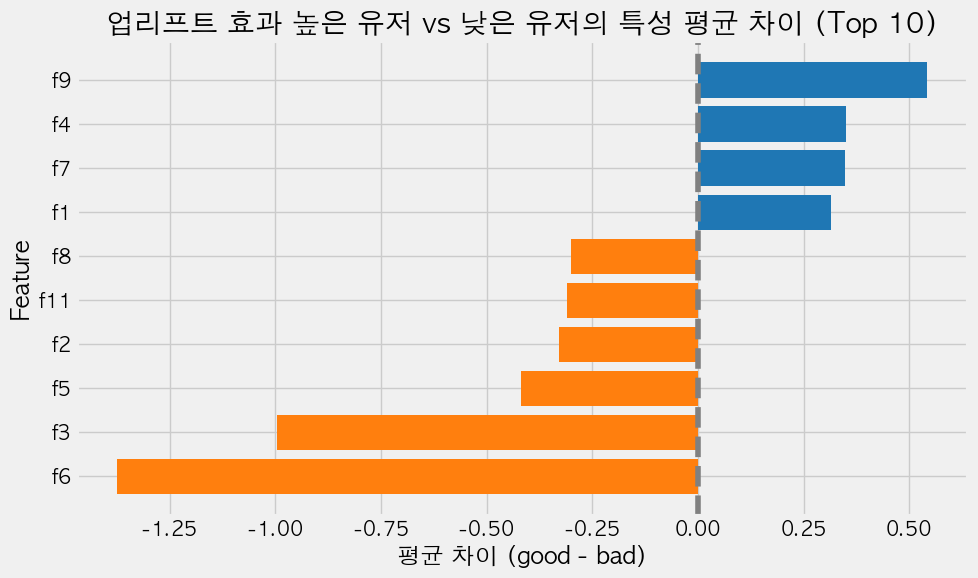

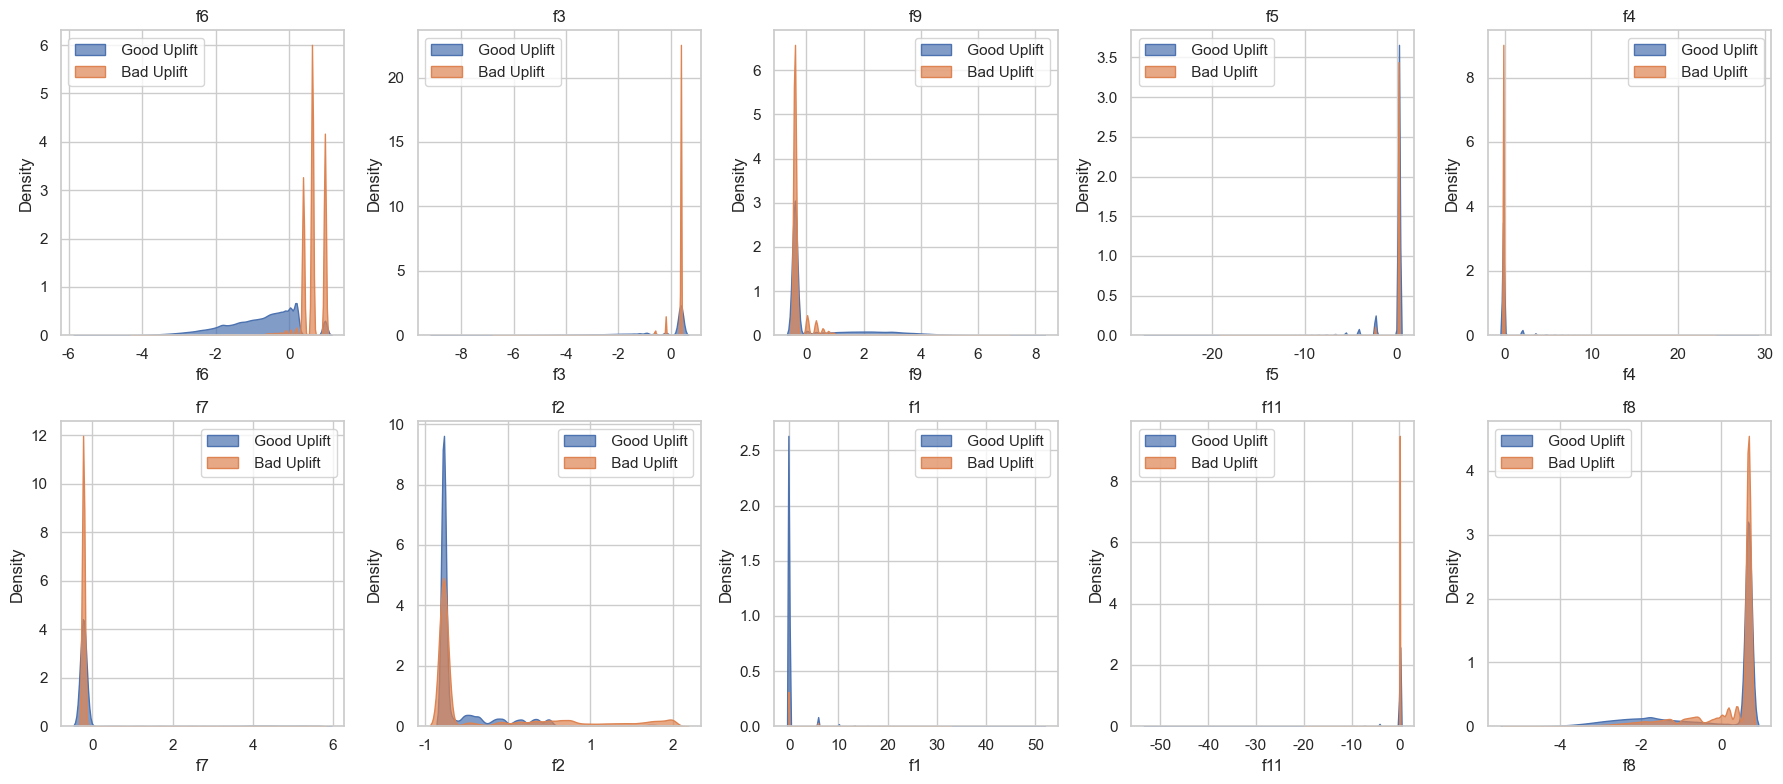

 업리프트 효과가 높은 유저 vs 낮은 유저 특징 (변수별 분석)

1. 업리프트가 높은 유저의 특징
  - f9, f4, f7, f1 값이 상대적으로 높음
  - f4, f7, f1도 Good Uplift 쪽이 오른쪽(값이 더 큼)

2. 업리프트가 낮은 유저의 특징
  - f6, f3, f5, f2, f11, f8 값이 상대적으로 높음
  - f6, f3, f5: Bad Uplift 쪽에서 분포가 오른쪽(값이 큼)
  - f2, f11, f8: Bad Uplift 쪽이 더 오른쪽

3. 분포 차이 해석
  - Good Uplift(상위20%): f9, f4, f7, f1 높은 분포, f6, f3 등은 낮음
  - Bad Uplift(하위20%): 대부분 변수에서 오른쪽(값이 높음)
 업리프트를 높이려면 f9, f4, f7, f1을 높이고 f6, f3, f5 등은 낮추는 특성이 유리


In [12]:
# ----------------------------------------
# 업리프트 상/하위 그룹 EDA (변수별 분포 및 평균차 시각화)
# ----------------------------------------
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False
# 1. 상위 20% vs 하위 20% 그룹 분리
good_users = X_test[X_test['uplift_pred'] >= np.percentile(X_test['uplift_pred'], 80)]
bad_users  = X_test[X_test['uplift_pred'] <= np.percentile(X_test['uplift_pred'], 20)]

# 2. 평균 차이 계산
good_mean = good_users[features].mean()
bad_mean = bad_users[features].mean()
diffs = good_mean - bad_mean

# 3. 상위 N개 feature만 추출 (절대값 기준)
top_n = 10
top_features = diffs.abs().sort_values(ascending=False).head(top_n).index
plot_df = diffs.loc[top_features].sort_values()

# 4. 색상(방향성 표시): good>bad(파랑), good<bad(주황)
colors = ['#1f77b4' if val > 0 else '#ff7f0e' for val in plot_df]

# 5. 막대그래프(평균 차이)
plt.figure(figsize=(10, 6))
bars = plt.barh(plot_df.index, plot_df.values, color=colors)
plt.axvline(0, color='gray', linestyle='--')
plt.title(f'업리프트 효과 높은 유저 vs 낮은 유저의 특성 평균 차이 (Top {top_n})')
plt.xlabel('평균 차이 (good - bad)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# 6. 각 feature별 분포 커널밀도그래프 (상위 N개만)
sns.set(style="whitegrid")
plt.figure(figsize=(18, 8))
for i, feature in enumerate(top_features):
    plt.subplot(2, 5, i + 1)
    sns.kdeplot(good_users[feature], label=' Good Uplift', fill=True, alpha=0.7)
    sns.kdeplot(bad_users[feature], label=' Bad Uplift', fill=True, alpha=0.7)
    plt.title(feature)
    plt.legend()
plt.tight_layout()
# 해석 주석 추가 (아래쪽 여백 활용)

plt.show()
print("="*40)
print(" 업리프트 효과가 높은 유저 vs 낮은 유저 특징 (변수별 분석)\n")
print("1. 업리프트가 높은 유저의 특징")
print("  - f9, f4, f7, f1 값이 상대적으로 높음")
print("  - f4, f7, f1도 Good Uplift 쪽이 오른쪽(값이 더 큼)\n")

print("2. 업리프트가 낮은 유저의 특징")
print("  - f6, f3, f5, f2, f11, f8 값이 상대적으로 높음")
print("  - f6, f3, f5: Bad Uplift 쪽에서 분포가 오른쪽(값이 큼)")
print("  - f2, f11, f8: Bad Uplift 쪽이 더 오른쪽\n")

print("3. 분포 차이 해석")
print("  - Good Uplift(상위20%): f9, f4, f7, f1 높은 분포, f6, f3 등은 낮음")
print("  - Bad Uplift(하위20%): 대부분 변수에서 오른쪽(값이 높음)")
print(" 업리프트를 높이려면 f9, f4, f7, f1을 높이고 f6, f3, f5 등은 낮추는 특성이 유리")
print("="*40)